# TOPOLOGY GRAPH / GEOMETRY EXTRACTION

In [1]:
import pickle
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
from src.svg import *
from src.extraction import *
from src.database import *
from src.vision import *
from src.matching import *

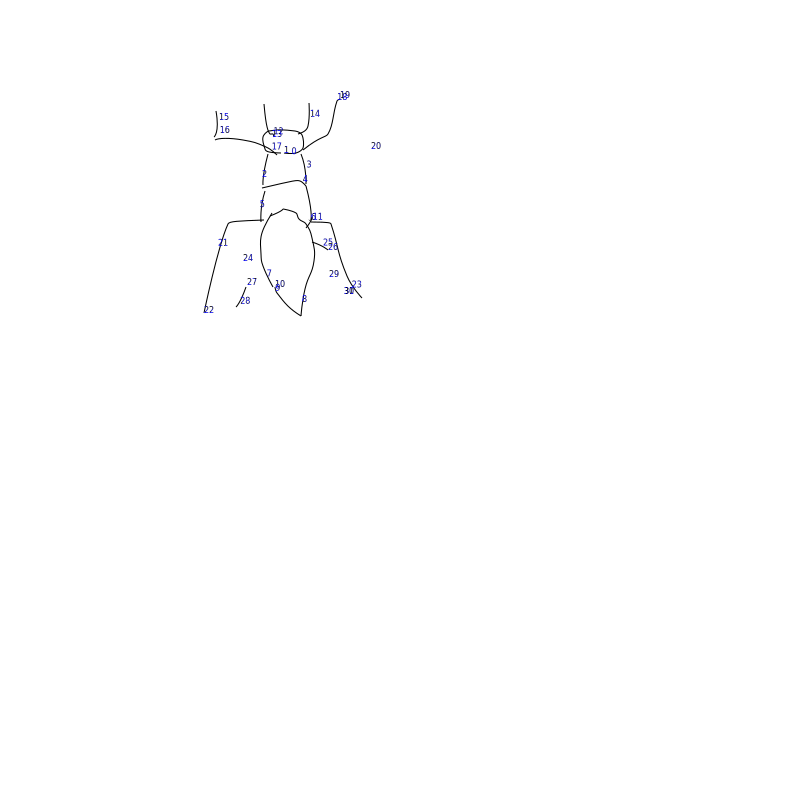

In [3]:
svg = load('assets/svg/ant/286.svg')
display(svg)

In [4]:
line_strings = get_line_strings(map(to_control_points, svg['paths']), step=15)

LINESTRING (270 150, 270 150, 270 150, 255 150, 255 150, 255 150, 255 150, 255 135, 255 135, 255 135, 255 135, 255 135, 255 135, 255 120, 255 120, 255 120, 255 120, 270 120, 270 120, 285 120, 285 120, 285 120, 300 120, 300 135, 300 135, 300 135, 300 135, 300 135, 300 135, 300 135, 285 150, 285 150, 285 150, 285 150, 270 150, 270 150)
<class 'shapely.geometry.linestring.LineString'>
141.21320343559643
0.0


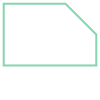

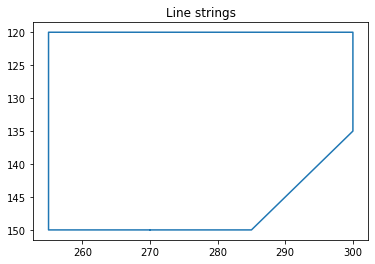

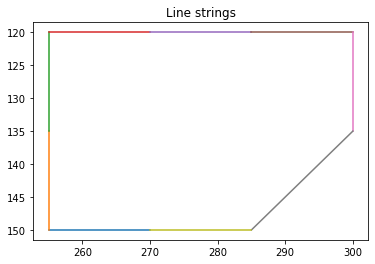

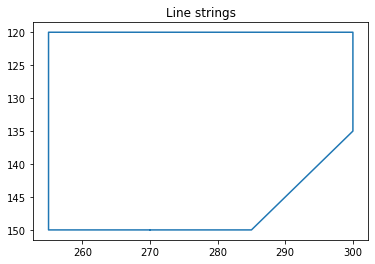

In [5]:
index = 0
ls = line_strings[index]

print(ls)
print(type(ls))
print(ls.length)

s, t = get_endpoints(ls)
print(s.distance(t))

plot_line_strings([ls])

segments = get_segments(ls)

# Plot segmented line string
plot_line_strings(segments)

# Plot closed line string
plot_line_strings([detect_approximate_polygon(ls)])

ls

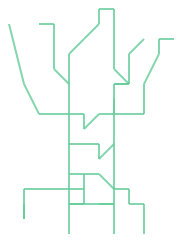

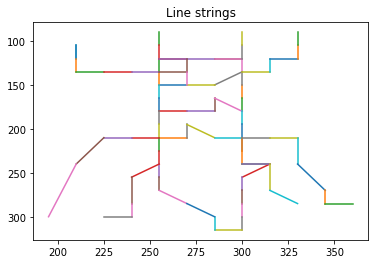

In [6]:
segments = []
for ls in line_strings:
    segments += get_segments(ls) 

# Plot segmented line string
plot_line_strings(segments)

shapely.MultiLineString(segments)

3


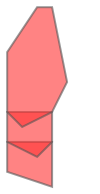

In [7]:
polygons = filter_polygons(get_polygons(line_strings), step=15)

print(len(polygons))

shapely.MultiPolygon(polygons)

### EXTRACTION

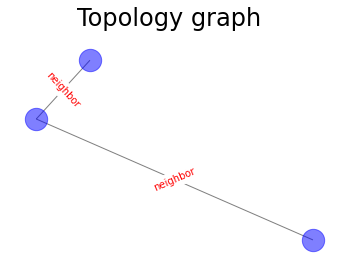

In [8]:
PATHS = map(to_control_points, svg['paths'])

G = extract_graph(PATHS, 'ant', step=15)

plot_graph(G)

G

# Image processing

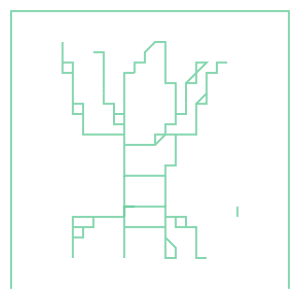

In [9]:
img = load_image('assets/test.png')

line_strings = get_image_line_strings(img, step=40)

shapely.MultiLineString(line_strings)

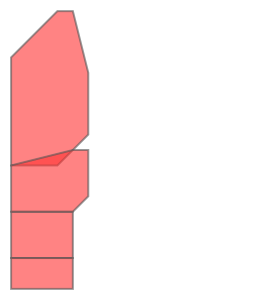

In [10]:
p = filter_polygons(get_polygons(line_strings), step=40)

shapely.MultiPolygon(p)

## Offline graph extraction

In [11]:
IMAGE_DIRECTORY = os.sep.join(['assets', 'svg'])

def load_svg_files(ext='svg'):
    """
    Returns an iterator that yields the image file paths and their labels.
    """    
    def get_label(path):
        return path.split(os.sep)[-1]
    
    files = []
    
    for r, _, f in os.walk(IMAGE_DIRECTORY):
        for file in f:
            if file.endswith(f'.{ext}'):
                label = get_label(r)
                file_path = os.path.join(r, file)
                
                files.append((file_path, label))
                
    return files


def load_svg_images(files):
    """
    Returns an iterator that yields the image data and their labels.
    """
    for f, l in files:
        print(f)
        yield load(f), l

def extract_graphs(images, step=20):
    """
    Extract all graphs from given images.
    """
    i = 0
    graphs = []
    for img, l in images:
        cp = map(to_control_points,img['paths'])
        
        try:
            graphs.append(extract_graph(cp, l, step=step))
        except StopIteration:
            print('drawing was too small')
        
        print(i)
        i += 1
        
    return graphs

In [12]:
# Extract graphs for each sketch in the dataset, offline processing step

# paths = load_svg_files()
# print(len(paths))

# images = load_svg_images(paths)

# graphs = extract_graphs(images, step=20)
# print(len(graphs))

In [13]:
def dump_graphs(graphs, prefix=""):
    with open(prefix+'graphs.p', 'wb') as f:
        pickle.dump(graphs, f)
        
def load_graphs(prefix=""):
    with open(prefix+'graphs.p', 'rb') as f:
        return pickle.load(f)

In [14]:
# Dump the graphs to avoid this offline step later
# dump_graphs(graphs)

In [15]:
# Load graphs from disk
graphs = load_graphs()

len(graphs)

15564

## DIMENSIONALITY REDUCTION

max:  101
min:  0
99% percentile:  17.0


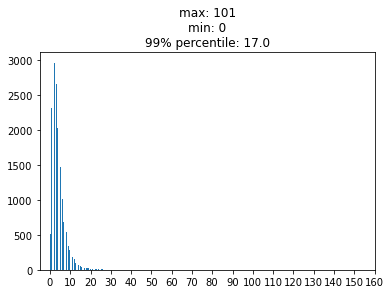

In [16]:
# Check the statistics for number of nodes

n = [len(g.nodes) for g in graphs]

fig = plt.figure()

# hist = np.histogram(n, bins=range(170))
plt.title(f'max: {max(n)}\nmin: {min(n)}\n99% percentile: {np.percentile(n, 99)}')
plt.hist(n, bins=170) #, density=True)

plt.xticks(np.arange(0, 170, step=10))

print('max: ', max(n))
print('min: ', min(n))
print('99% percentile: ', np.percentile(n, 99))

max:  2028
min:  0
99% percentile:  47.0


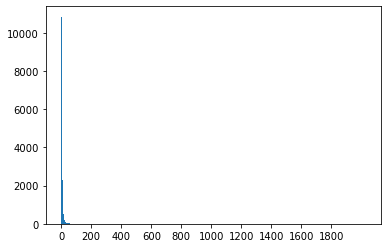

In [17]:
# Check the statistics for number of edges

e = [len(g.edges) for g in graphs]

# hist = np.histogram(e, bins=range(170))

fig = plt.figure()

plt.hist(e, bins=500) #, density=True)

plt.xticks(np.arange(0, 2000, step=200))

print('max: ', max(e))
print('min: ', min(e))
print('99% percentile: ', np.percentile(e, 99))

In [18]:
# Check descriptor collisions for a given descriptor length
maximum = max(n)

print('100th percentile (maximum): ', maximum )

descriptors_max = [descriptor(g, N=maximum).tobytes() for g in graphs]

c_max = Counter(descriptors_max)

print('Unique descriptors: ', list(c_max.values()).count(1))

[(np.frombuffer(d, dtype=float), c) for d, c in c_max.most_common()]

100th percentile (maximum):  101
Unique descriptors:  3114


[(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  3715),
 (array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  2969),
 (array([1.41421356e+00, 1.41421356e+00, 2.77516890e-17, 0.000

In [19]:
# Check descriptor collisions for a given descriptor length

import pandas as pd

percent = 84

percentile = int(np.percentile(n,percent))

print(f'{percent}th percentile: ', percentile)

descriptors = [descriptor(g, N=percentile).tobytes() for g in graphs]

c_percentile = Counter(descriptors)

print('Unique descriptors: ', list(c_percentile.values()).count(1))

data = [(np.frombuffer(d, dtype=float), c) for d, c in c_percentile.most_common()]

df = pd.DataFrame(data, columns =['Descriptor', 'Counts'])
df

84th percentile:  7
Unique descriptors:  3114


,Descriptor,Counts
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",3715
1,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2969
2,"[1.4142135623730954, 1.4142135623730951, 2.775...",958
3,"[1.9999999999999996, 1.0, 0.9999999999999999, ...",859
4,"[1.4142135623730951, 1.414213562373095, 0.0, 0...",540
...,...,...
3478,"[2.3455198572758245, 1.8595812127072666, 1.618...",1
3479,"[3.4438959399100098, 2.923060905780924, 2.1741...",1
3480,"[3.4301831477144753, 2.6554423815498294, 2.161...",1
3481,"[4.361303610506675, 2.7937532591185676, 2.0828...",1
